In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [6]:
!pip install yfinance


In [5]:
import yfinance as yf
import datetime

start = '2021-01-01'
end = '2023-12-22'

# Define the stock symbol (in this case, TCS)
stock_symbol = 'TCS.BO'  # 'TCS.BO' for BSE or 'TCS.NS' for NSE

# Fetch historical stock data using yfinance
df = yf.download(stock_symbol, start=start, end=end)

# Display the first few rows of the DataFrame
print(df.head())
df.tail()


[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-01-01  2879.000000  2939.899902  2877.300049  2928.199951  2827.296875   
2021-01-04  2950.000000  3050.000000  2942.000000  3039.250000  2934.520508   
2021-01-05  3044.100098  3112.750000  3040.000000  3092.300049  2985.742188   
2021-01-06  3102.149902  3114.449951  3037.800049  3052.949951  2947.748291   
2021-01-07  3075.000000  3079.800049  3001.000000  3032.699951  2928.196045   

            Volume  
Date                
2021-01-01  152353  
2021-01-04  208783  
2021-01-05  188379  
2021-01-06  118089  
2021-01-07  160557  


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-15,3660.199951,3894.050049,3660.199951,3860.050049,3860.050049,272428
2023-12-18,3860.000000,3928.949951,3831.199951,3858.000000,3858.000000,73334
2023-12-19,3841.399902,3852.000000,3791.000000,3812.100098,3812.100098,54142
2023-12-20,3821.600098,3898.850098,3768.000000,3780.350098,3780.350098,60720
2023-12-21,3734.399902,3805.000000,3734.399902,3789.449951,3789.449951,90556


In [6]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,2879.000000,2939.899902,2877.300049,2928.199951,2827.296875,152353
1,2021-01-04,2950.000000,3050.000000,2942.000000,3039.250000,2934.520508,208783
2,2021-01-05,3044.100098,3112.750000,3040.000000,3092.300049,2985.742188,188379
3,2021-01-06,3102.149902,3114.449951,3037.800049,3052.949951,2947.748291,118089
4,2021-01-07,3075.000000,3079.800049,3001.000000,3032.699951,2928.196045,160557


In [7]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,2879.000000,2939.899902,2877.300049,2928.199951,152353
1,2950.000000,3050.000000,2942.000000,3039.250000,208783
2,3044.100098,3112.750000,3040.000000,3092.300049,188379
3,3102.149902,3114.449951,3037.800049,3052.949951,118089
4,3075.000000,3079.800049,3001.000000,3032.699951,160557


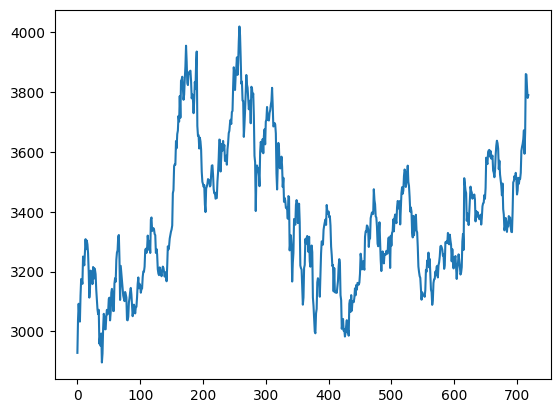

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,2879.000000,2939.899902,2877.300049,2928.199951,152353
1,2950.000000,3050.000000,2942.000000,3039.250000,208783
2,3044.100098,3112.750000,3040.000000,3092.300049,188379
3,3102.149902,3114.449951,3037.800049,3052.949951,118089
4,3075.000000,3079.800049,3001.000000,3032.699951,160557
...,...,...,...,...,...
714,3660.199951,3894.050049,3660.199951,3860.050049,272428
715,3860.000000,3928.949951,3831.199951,3858.000000,73334
716,3841.399902,3852.000000,3791.000000,3812.100098,54142
717,3821.600098,3898.850098,3768.000000,3780.350098,60720


In [10]:
ma5=df.Close.rolling(100).mean()
ma5

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
714    3479.676008
715    3485.533008
716    3488.534009
717    3491.418010
718    3494.602510
Name: Close, Length: 719, dtype: float64

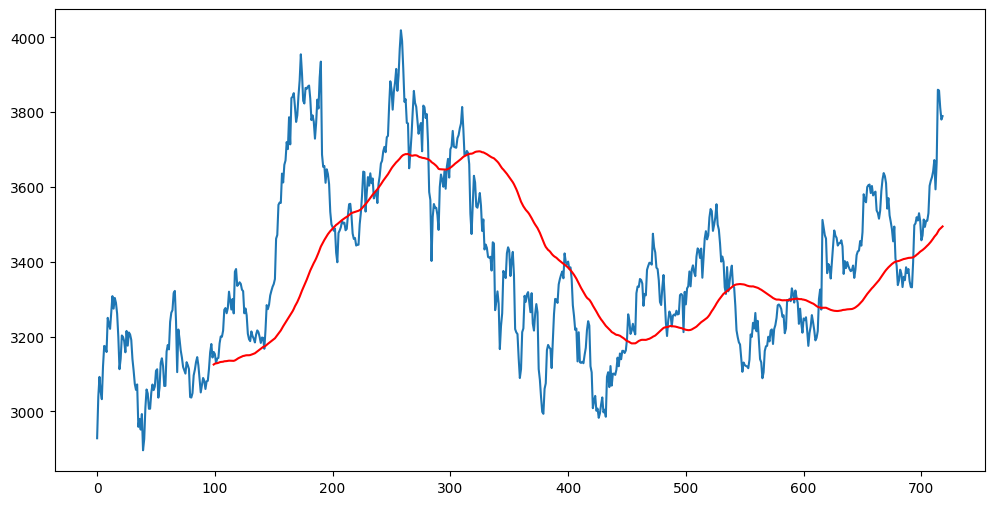

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma5,'r')

In [12]:
ma10=df.Close.rolling(200).mean()
ma10

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
714    3378.809501
715    3381.061251
716    3382.812002
717    3384.304502
718    3385.951752
Name: Close, Length: 719, dtype: float64

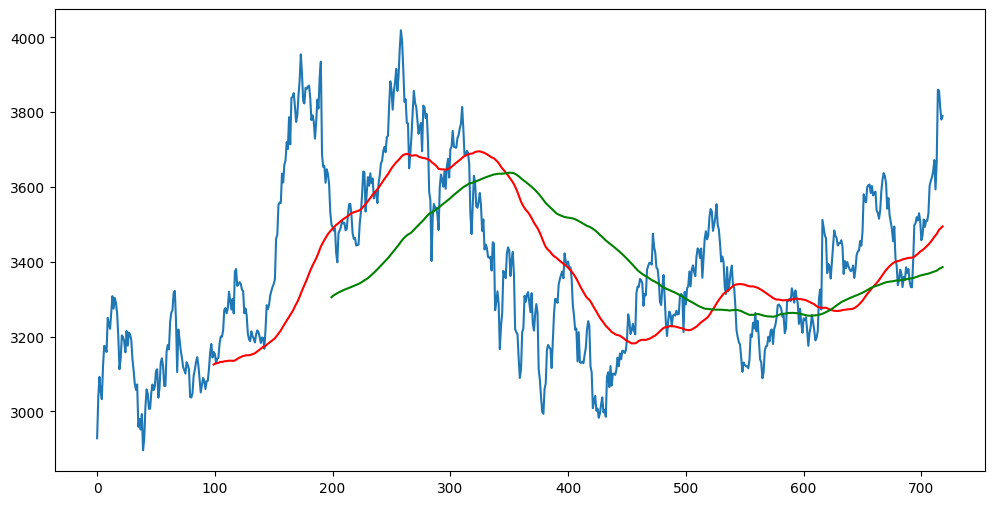

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma5,'r')
plt.plot(ma10,'g')

In [14]:
df.shape

(719, 5)

In [15]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(503, 1)
(216, 1)


In [16]:
data_training.head()

,Close
0,2928.199951
1,3039.250000
2,3092.300049
3,3052.949951
4,3032.699951


In [17]:
data_testing.head()

,Close
503,3374.199951
504,3334.399902
505,3378.850098
506,3390.550049
507,3372.399902


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02862731],
       [0.12750986],
       [0.17474733],
       [0.13970874],
       [0.12167748],
       [0.199724  ],
       [0.2484306 ],
       [0.24647169],
       [0.23396108],
       [0.31530194],
       [0.30056545],
       [0.28916788],
       [0.32865842],
       [0.36699157],
       [0.33725122],
       [0.36271745],
       [0.35096379],
       [0.32500778],
       [0.27015706],
       [0.19309011],
       [0.21784417],
       [0.27331814],
       [0.26984554],
       [0.2593384 ],
       [0.23329325],
       [0.28413681],
       [0.24909843],
       [0.28039703],
       [0.27585596],
       [0.26276643],
       [0.21717634],
       [0.18988468],
       [0.15800716],
       [0.14380481],
       [0.15676064],
       [0.05583006],
       [0.07475175],
       [0.0492853 ],
       [0.08623823],
       [0.        ],
       [0.02684645],
       [0.10195449],
       [0.14478416],
       [0.13503397],
       [0.09879342],
       [0.09897146],
       [0.13703744],
       [0.156

In [20]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [21]:
x_train.shape

(403, 100, 1)

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='linear'))  # Adjusted the output layer for regression

# Compile the model (add optimizer and loss function based on your task)
model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust optimizer and loss function as needed


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
13/13 [==============================] - 11s 397ms/step - loss: 0.1716
Epoch 2/50
13/13 [==============================] - 5s 372ms/step - loss: 0.0650
Epoch 3/50
13/13 [==============================] - 4s 290ms/step - loss: 0.0430
Epoch 4/50
13/13 [==============================] - 4s 270ms/step - loss: 0.0370
Epoch 5/50
13/13 [==============================] - 5s 436ms/step - loss: 0.0339
Epoch 6/50
13/13 [==============================] - 4s 271ms/step - loss: 0.0295
Epoch 7/50
13/13 [==============================] - 5s 373ms/step - loss: 0.0279
Epoch 8/50
13/13 [==============================] - 4s 335ms/step - loss: 0.0276
Epoch 9/50
13/13 [==============================] - 5s 355ms/step - loss: 0.0237
Epoch 10/50
13/13 [==============================] - 3s 260ms/step - loss: 0.0234
Epoch 11/50
13/13 [==============================] - 3s 264ms/step - loss: 0.0240
Epoch 12/50
13/13 [==============================] - 5s 382ms/step - loss: 0.0198
Epoch 13/50
13/13 [=====

In [25]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
data_testing.head()

,Close
503,3374.199951
504,3334.399902
505,3378.850098
506,3390.550049
507,3372.399902


In [27]:
data_testing.head()

,Close
503,3374.199951
504,3334.399902
505,3378.850098
506,3390.550049
507,3372.399902


In [28]:
past_100_days=data_training.tail(100)

In [29]:
final_df=past_100_days.append(data_testing,ignore_index=True)

<ipython-input-29-46277fdece45>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [30]:
final_df.head()

,Close
0,3354.250000
1,3283.750000
2,3255.350098
3,3218.100098
4,3221.649902


In [31]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.42342542],
       [0.34306065],
       [0.31068686],
       [0.26822462],
       [0.27227114],
       [0.17201471],
       [0.2608151 ],
       [0.16956398],
       [0.16739795],
       [0.17104594],
       [0.16648623],
       [0.19184959],
       [0.2132232 ],
       [0.26731262],
       [0.29467085],
       [0.28110556],
       [0.15736683],
       [0.13855805],
       [0.02946692],
       [0.05215161],
       [0.06679949],
       [0.02160154],
       [0.02827022],
       [0.        ],
       [0.01362206],
       [0.04086618],
       [0.06218301],
       [0.01658598],
       [0.02485044],
       [0.00330567],
       [0.12504982],
       [0.13895686],
       [0.0936448 ],
       [0.15776563],
       [0.09820451],
       [0.1344542 ],
       [0.13479624],
       [0.13092032],
       [0.14687929],
       [0.18347102],
       [0.15725272],
       [0.19612431],
       [0.17851223],
       [0.20421761],
       [0.20404674],
       [0.19760599],
       [0.20535754],
       [0.239

In [32]:
input_data.shape

(316, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])


In [34]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(216, 100, 1)
(216,)


In [35]:
y_predicted =model.predict(x_test)

7/7 [==============================] - 1s 81ms/step


In [36]:
y_test

array([0.44616689, 0.40079778, 0.45146771, 0.46480479, 0.44411497,
       0.43186076, 0.49153599, 0.51644349, 0.51154175, 0.48743215,
       0.5159303 , 0.42707313, 0.48429735, 0.54619539, 0.56888008,
       0.54397259, 0.55611269, 0.61088618, 0.63647746, 0.62997994,
       0.5699059 , 0.58860057, 0.61111411, 0.65106857, 0.58917054,
       0.57372476, 0.53188926, 0.47620405, 0.4916501 , 0.47563408,
       0.39789119, 0.37771428, 0.45944719, 0.38569376, 0.41031627,
       0.44308914, 0.46383574, 0.40427461, 0.3969792 , 0.34152163,
       0.26679971, 0.24616694, 0.23020798, 0.22359635, 0.18056415,
       0.14032471, 0.16859493, 0.16095748, 0.15805062, 0.15651188,
       0.15126811, 0.17703055, 0.25420348, 0.24673691, 0.28954118,
       0.27232819, 0.31963511, 0.2638358 , 0.29558284, 0.23602171,
       0.17874044, 0.169279  , 0.12071804, 0.13867188, 0.20387558,
       0.21812465, 0.21943574, 0.24724982, 0.23288692, 0.26583067,
       0.26947837, 0.22513537, 0.27078945, 0.28275868, 0.30453

In [37]:
y_predicted

array([[0.35131636],
       [0.36494714],
       [0.37812853],
       [0.3907875 ],
       [0.40283206],
       [0.41340902],
       [0.42128024],
       [0.4268964 ],
       [0.43152574],
       [0.43606427],
       [0.44031844],
       [0.44452196],
       [0.44663247],
       [0.4463425 ],
       [0.44547662],
       [0.44636133],
       [0.4499195 ],
       [0.45644215],
       [0.4669325 ],
       [0.48224857],
       [0.50190425],
       [0.52283823],
       [0.5424467 ],
       [0.5594071 ],
       [0.57406735],
       [0.58543926],
       [0.5924711 ],
       [0.593873  ],
       [0.5886273 ],
       [0.5775971 ],
       [0.56221235],
       [0.54330254],
       [0.5218118 ],
       [0.49964288],
       [0.4776844 ],
       [0.45677778],
       [0.43786576],
       [0.4218246 ],
       [0.40853506],
       [0.39752018],
       [0.387746  ],
       [0.37794355],
       [0.3672928 ],
       [0.35545352],
       [0.34259874],
       [0.32901788],
       [0.31502518],
       [0.301

In [38]:
scaler.scale_

array([0.00113993])

In [39]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

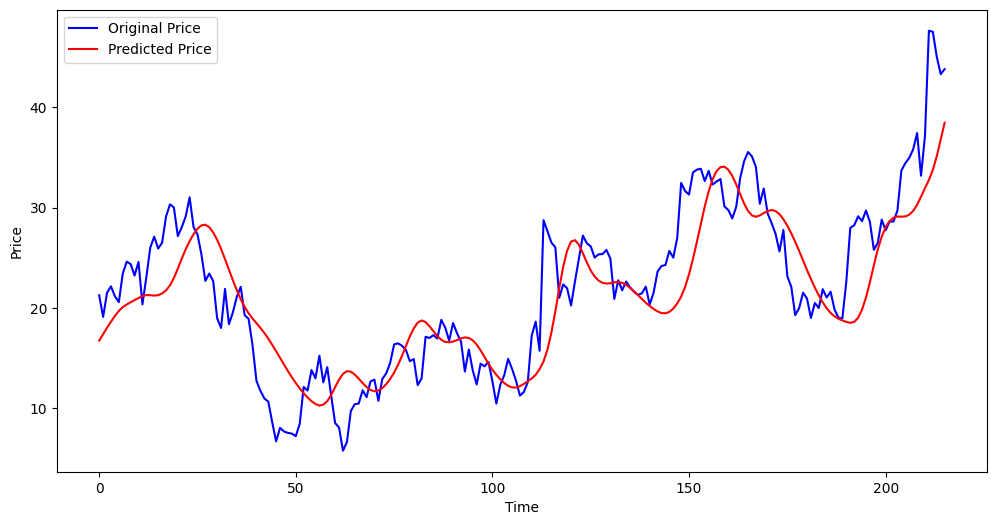

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()